# **TimesFM - Google's Foundational Model for Time Series Forecasting**

#**Reading The Data**

In [ ]:
import pandas as pd
df = pd.read_csv("GoldPrices.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').resample('MS').mean()
df = df.reset_index() # Reset index to have 'ds' as a column again
print(df.head())

        Date  India(INR)
0 2008-12-01     42374.2
1 2009-01-01     44945.2
2 2009-02-01     48685.3
3 2009-03-01     46498.6
4 2009-04-01     44193.4


<ipython-input-6-2fd8dda7bb6d>:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df.head()

,Date,India(INR)
0,2008-12-01,42374.2
1,2009-01-01,44945.2
2,2009-02-01,48685.3
3,2009-03-01,46498.6
4,2009-04-01,44193.4


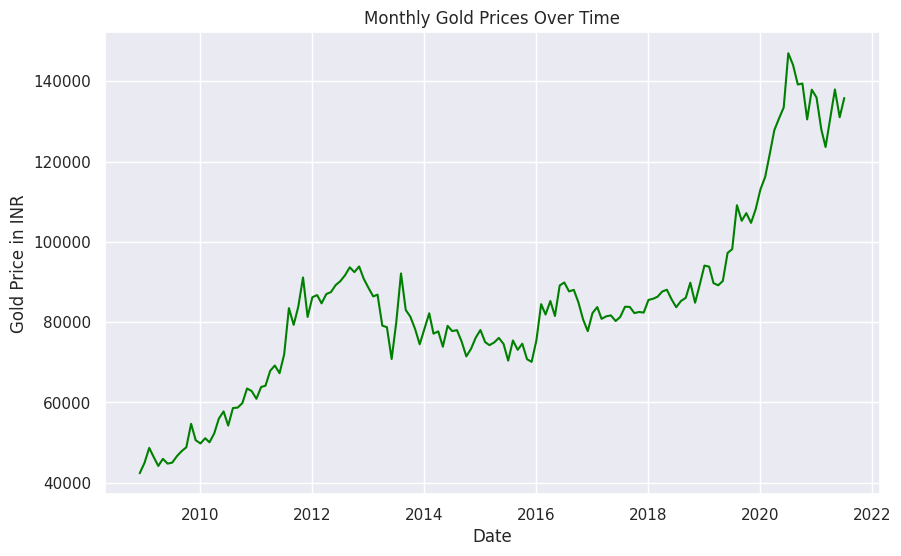

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x="Date", y='India(INR)', data=df, color='green')
plt.title('Monthly Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Gold Price in INR')
plt.show()


In [ ]:
df

,Date,India(INR)
0,2008-12-01,42374.2
1,2009-01-01,44945.2
2,2009-02-01,48685.3
3,2009-03-01,46498.6
4,2009-04-01,44193.4
...,...,...
147,2021-03-01,123639.0
148,2021-04-01,130934.3
149,2021-05-01,137979.1
150,2021-06-01,131054.9


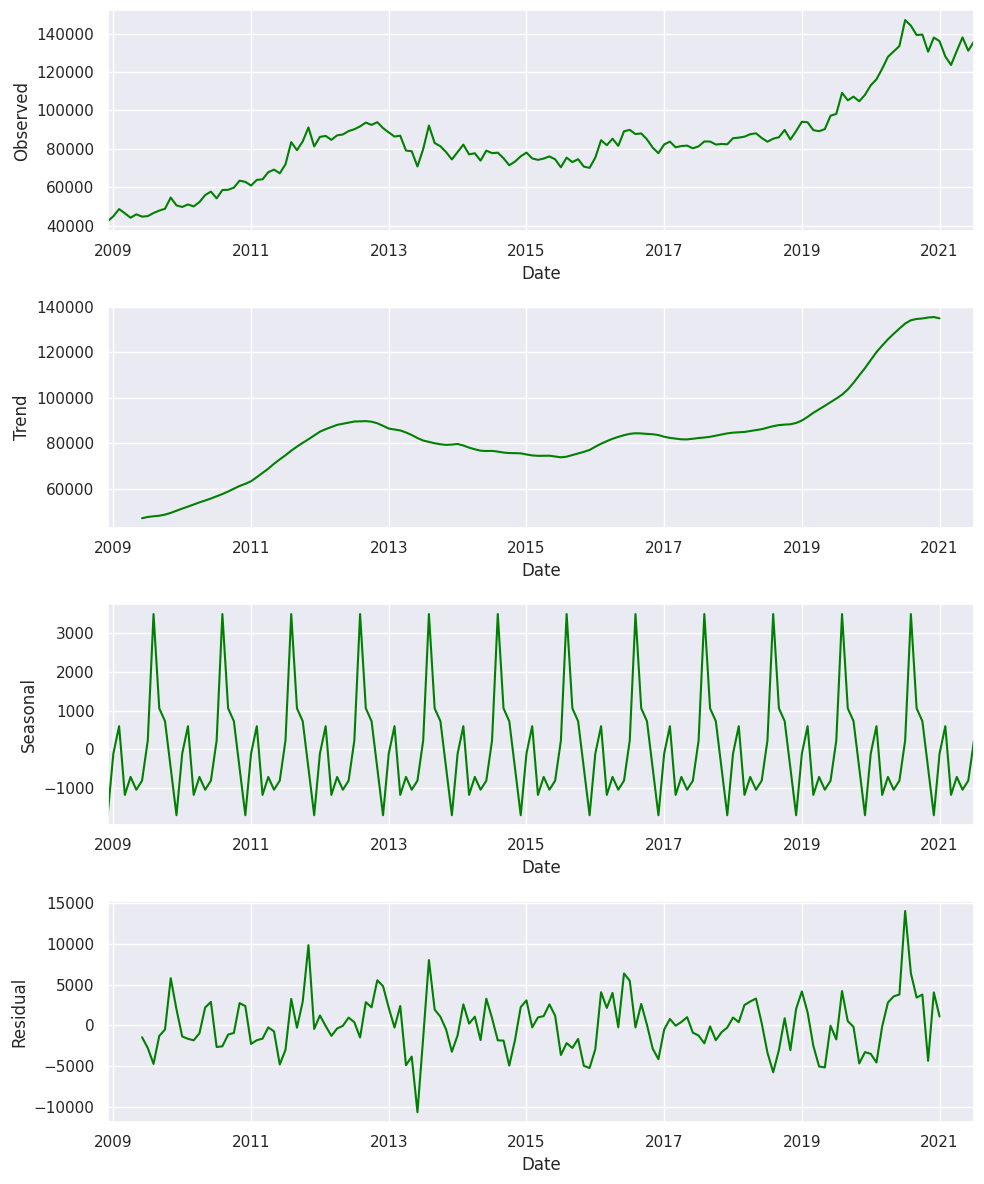

In [ ]:
df.set_index("Date", inplace=True)
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['India(INR)'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 12))

result.observed.plot(ax=ax1, color='green')
ax1.set_ylabel('Observed')

result.trend.plot(ax=ax2, color='green')
ax2.set_ylabel('Trend')

result.seasonal.plot(ax=ax3, color='green')
ax3.set_ylabel('Seasonal')

result.resid.plot(ax=ax4, color='green')
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()

df.reset_index(inplace=True)



# Arranging the Data in Format as Required by the Models

In [ ]:
df = pd.DataFrame({'unique_id':[1]*len(df),
        'ds': df["Date"], "y":df['India(INR)']})

In [ ]:
#We will use 128 datapoints for training and 24 for test
train_df = df[df['ds'] <= '31-07-2019']
test_df = df[df['ds'] > '31-07-2019']

#STATISTICAL MODELLING

In [ ]:
!pip install statsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.5/223.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 14.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, AutoETS

# Define the AutoARIMA model
autoarima = AutoARIMA(season_length=12)  # Annual seasonality for monthly data

# Define the AutoETS model
autoets = AutoETS(season_length=12)  # Annual seasonality for monthly data

# Create StatsForecast object with AutoARIMA
statforecast = StatsForecast(df=train_df,
                         models=[autoarima, autoets],
                         freq='MS',
                         n_jobs=-1)

# Fit the model
statforecast.fit()

# Generate forecasts
sf_forecast = statforecast.forecast(h=24)  # Forecasting for 24 periods

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method inst

In [ ]:
sf_forecast

,ds,AutoARIMA,AutoETS
unique_id,,,
1,2019-08-01,96912.523438,98489.757812
1,2019-09-01,97015.992188,99109.593750
1,2019-10-01,97197.710938,99729.437500
1,2019-11-01,97145.851562,100349.273438
1,2019-12-01,97127.359375,100969.109375
1,2020-01-01,97139.148438,101588.945312
1,2020-02-01,97139.757812,102208.781250
1,2020-03-01,97137.781250,102828.617188
1,2020-04-01,97138.070312,103448.460938


#MLForecast

In [ ]:
!pip install mlforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 664.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.0 MB/s eta 0:00:00


In [ ]:
from mlforecast import MLForecast
from mlforecast.target_transforms import AutoDifferences
from numba import njit
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from mlforecast import MLForecast
from mlforecast.lag_transforms import (
    RollingMean, RollingStd, RollingMin, RollingMax, RollingQuantile,
    SeasonalRollingMean, SeasonalRollingStd, SeasonalRollingMin,
    SeasonalRollingMax, SeasonalRollingQuantile,
    ExpandingMean
)

In [ ]:
models = [lgb.LGBMRegressor(verbosity=-1),  # LightGBM regressor with verbosity turned off
    xgb.XGBRegressor(),  # XGBoost regressor with default parameters
    RandomForestRegressor(random_state=0),  # Random Forest regressor with fixed random state for reproducibility
]
fcst = MLForecast(
    models=models,  # List of models to be used for forecasting
    freq='MS',  # Monthly frequency, starting at the beginning of each month
    lags=[1,3,5,7,12],  # Lag features: values from 1, 3, 5, 7, and 12 time steps ago
    lag_transforms={
        1: [  # Transformations applied to lag 1
            RollingMean(window_size=3),  # Rolling mean with a window of 3 time steps
            RollingStd(window_size=3),  # Rolling standard deviation with a window of 3 time steps
            RollingMin(window_size=3),  # Rolling minimum with a window of 3 time steps
            RollingMax(window_size=3),  # Rolling maximum with a window of 3 time steps
            RollingQuantile(p=0.5, window_size=3),  # Rolling median (50th percentile) with a window of 3 time steps
            ExpandingMean()  # Expanding mean (mean of all previous values)
        ],
        6:[  # Transformations applied to lag 6
            RollingMean(window_size=6),  # Rolling mean with a window of 6 time steps
            RollingStd(window_size=6),  # Rolling standard deviation with a window of 6 time steps
            RollingMin(window_size=6),  # Rolling minimum with a window of 6 time steps
            RollingMax(window_size=6),  # Rolling maximum with a window of 6 time steps
            RollingQuantile(p=0.5, window_size=6),  # Rolling median (50th percentile) with a window of 6 time steps
        ],
        12: [  # Transformations applied to lag 12 (likely for yearly seasonality)
            SeasonalRollingMean(season_length=12, window_size=3),  # Seasonal rolling mean with 12-month seasonality and 3-month window
            SeasonalRollingStd(season_length=12, window_size=3),  # Seasonal rolling standard deviation with 12-month seasonality and 3-month window
            SeasonalRollingMin(season_length=12, window_size=3),  # Seasonal rolling minimum with 12-month seasonality and 3-month window
            SeasonalRollingMax(season_length=12, window_size=3),  # Seasonal rolling maximum with 12-month seasonality and 3-month window
            SeasonalRollingQuantile(p=0.5, season_length=12, window_size=3)  # Seasonal rolling median with 12-month seasonality and 3-month window
        ]
    },
    date_features=['year', 'month', 'quarter'],  # Extract year, month, and quarter from the date as features
    target_transforms=[AutoDifferences(max_diffs=3)])

In [ ]:
fcst.fit(train_df)
ml_forecast = fcst.predict(len(test_df))

In [ ]:
ml_forecast

,unique_id,ds,LGBMRegressor,XGBRegressor,RandomForestRegressor
0,1,2019-08-01,96499.785654,98780.080200,97460.762
1,1,2019-09-01,95650.208082,99669.508728,95561.035
2,1,2019-10-01,95264.389259,97238.388611,95315.696
3,1,2019-11-01,94896.623589,95561.138123,94928.818
4,1,2019-12-01,94372.883053,95057.195648,94595.718
5,1,2020-01-01,96623.439078,94548.089172,94732.966
6,1,2020-02-01,98969.348248,94257.033691,93367.867
7,1,2020-03-01,100135.924372,93560.599792,94120.881
8,1,2020-04-01,100204.914299,94761.286316,93710.322
9,1,2020-05-01,100494.111879,96161.264954,93416.288


#TIMEGPT

In [ ]:
!pip install nixtla

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 826.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.7 MB/s eta 0:00:00


In [ ]:
from nixtla import NixtlaClient
# Get your API Key at dashboard.nixtla.io
# 1. Instantiate the NixtlaClient
nixtla_client = NixtlaClient(api_key = 'Your_API_Key')

# 2. Get the forecast
timegpt_forecast = nixtla_client.forecast(df = train_df, h=24, freq="M")



In [ ]:
timegpt_forecast

,unique_id,ds,TimeGPT
0,1,2019-08-01,96605.984375
1,1,2019-09-01,95637.093750
2,1,2019-10-01,95362.929688
3,1,2019-11-01,94335.390625
4,1,2019-12-01,94808.945312
5,1,2020-01-01,95810.796875
6,1,2020-02-01,95926.890625
7,1,2020-03-01,95180.578125
8,1,2020-04-01,94824.421875
9,1,2020-05-01,95190.000000


#TIMESFM

In [ ]:
#!pip install timesfm
import timesfm

In [ ]:
# Initialize the TimesFM model with specified parameters
tfm = timesfm.TimesFm(
    context_len=128,       # Length of the context window for the model
    horizon_len=24,        # Forecasting horizon length
    input_patch_len=32,    # Length of input patches
    output_patch_len=128,  # Length of output patches
    num_layers=20,
    model_dims=1280,
)

# Load the pretrained model checkpoint
tfm.load_from_checkpoint(repo_id="google/timesfm-1.0-200m")

# Generate forecasts using the TimesFM model on the given DataFrame
timesfm_forecast = tfm.forecast_on_df(
    inputs=train_df,       # Input DataFrame containing the time-series data for training
    freq="MS",             # Frequency of the time-series data (e.g., monthly start)
    value_name="y",        # Name of the column containing the values to be forecasted
    num_jobs=-1,           # Number of parallel jobs to use for forecasting (-1 uses all available cores)
)


Multiprocessing context has already been set.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

(…)oint_1100000/descriptor/descriptor.pbtxt:   0%|          | 0.00/499 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.73k [00:00<?, ?B/s]

(…)nts/checkpoint_1100000/metadata/metadata:   0%|          | 0.00/43.9k [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

checkpoint:   0%|          | 0.00/814M [00:00<?, ?B/s]

Constructing model weights.


Constructed model weights in 6.24 seconds.
Restoring checkpoint from /root/.cache/huggingface/hub/models--google--timesfm-1.0-200m/snapshots/8775f7531211ac864b739fe776b0b255c277e2be/checkpoints.


ERROR:absl:For checkpoint version > 1.0, we require users to provide
          `train_state_unpadded_shape_dtype_struct` during checkpoint
          saving/restoring, to avoid potential silent bugs when loading
          checkpoints to incompatible unpadded shapes of TrainState.


Restored checkpoint in 2.70 seconds.
Jitting decoding.
Jitted decoding in 45.14 seconds.
Processing dataframe with multiple processes.


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Finished preprocessing dataframe.
Finished forecasting.


In [ ]:
timesfm_forecast = timesfm_forecast[["ds","timesfm"]]

In [ ]:
# Assuming the DataFrames have a common column 'ds' for the dates
# Convert 'ds' to datetime in all DataFrames if necessary
sf_forecast['ds'] = pd.to_datetime(sf_forecast['ds'])
ml_forecast['ds'] = pd.to_datetime(ml_forecast['ds'])
timegpt_forecast['ds'] = pd.to_datetime(timegpt_forecast['ds'])
timesfm_forecast['ds'] = pd.to_datetime(timesfm_forecast['ds'])

# Now perform the merges
merged_fcst = pd.merge(sf_forecast, ml_forecast, on='ds')
merged_fcst = pd.merge(merged_fcst, timegpt_forecast, on='ds')
merged_fcst = pd.merge(merged_fcst, timesfm_forecast, on='ds')
merged_fcst

,ds,AutoARIMA,AutoETS,unique_id_x,LGBMRegressor,XGBRegressor,RandomForestRegressor,unique_id_y,TimeGPT,timesfm
0,2019-08-01,96912.523438,98489.757812,1,96499.785654,98780.080200,97460.762,1,96605.984375,100097.210938
1,2019-09-01,97015.992188,99109.593750,1,95650.208082,99669.508728,95561.035,1,95637.093750,100703.414062
2,2019-10-01,97197.710938,99729.437500,1,95264.389259,97238.388611,95315.696,1,95362.929688,101442.000000
3,2019-11-01,97145.851562,100349.273438,1,94896.623589,95561.138123,94928.818,1,94335.390625,102236.070312
4,2019-12-01,97127.359375,100969.109375,1,94372.883053,95057.195648,94595.718,1,94808.945312,103544.429688
5,2020-01-01,97139.148438,101588.945312,1,96623.439078,94548.089172,94732.966,1,95810.796875,103679.195312
6,2020-02-01,97139.757812,102208.781250,1,98969.348248,94257.033691,93367.867,1,95926.890625,103302.414062
7,2020-03-01,97137.781250,102828.617188,1,100135.924372,93560.599792,94120.881,1,95180.578125,103733.007812
8,2020-04-01,97138.070312,103448.460938,1,100204.914299,94761.286316,93710.322,1,94824.421875,105117.820312
9,2020-05-01,97138.328125,104068.296875,1,100494.111879,96161.264954,93416.288,1,95190.000000,104605.726562


In [ ]:
#Adding the actuals to the dataframe from test_df
merged_fcst = pd.merge(merged_fcst, test_df, on='ds')

In [ ]:
merged_fcst = merged_fcst[["unique_id", "ds", "AutoARIMA", "AutoETS", "LGBMRegressor", "XGBRegressor", "RandomForestRegressor", "TimeGPT", "timesfm", "y"]]

In [ ]:
merged_fcst

,unique_id,ds,AutoARIMA,AutoETS,LGBMRegressor,XGBRegressor,RandomForestRegressor,TimeGPT,timesfm,y
0,1,2019-08-01,96912.523438,98489.757812,96499.785654,98780.080200,97460.762,96605.984375,100097.210938,109139.2
1,1,2019-09-01,97015.992188,99109.593750,95650.208082,99669.508728,95561.035,95637.093750,100703.414062,105261.4
2,1,2019-10-01,97197.710938,99729.437500,95264.389259,97238.388611,95315.696,95362.929688,101442.000000,107169.8
3,1,2019-11-01,97145.851562,100349.273438,94896.623589,95561.138123,94928.818,94335.390625,102236.070312,104747.5
4,1,2019-12-01,97127.359375,100969.109375,94372.883053,95057.195648,94595.718,94808.945312,103544.429688,108120.0
5,1,2020-01-01,97139.148438,101588.945312,96623.439078,94548.089172,94732.966,95810.796875,103679.195312,113044.6
6,1,2020-02-01,97139.757812,102208.781250,98969.348248,94257.033691,93367.867,95926.890625,103302.414062,116178.9
7,1,2020-03-01,97137.781250,102828.617188,100135.924372,93560.599792,94120.881,95180.578125,103733.007812,121719.1
8,1,2020-04-01,97138.070312,103448.460938,100204.914299,94761.286316,93710.322,94824.421875,105117.820312,127868.0
9,1,2020-05-01,97138.328125,104068.296875,100494.111879,96161.264954,93416.288,95190.000000,104605.726562,130717.8


In [ ]:
merged_fcst.to_csv("TimesFM_Forecast_Comparison.csv")

#Evaluation

In [ ]:
import numpy as np
def calculate_error_metrics(actual_values, predicted_values):
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)

    metrics_dict = {
        'MAE': np.mean(np.abs(actual_values - predicted_values)),
        'RMSE': np.sqrt(np.mean((actual_values - predicted_values)**2)),
        'MAPE': np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100
    }

    result_df = pd.DataFrame(list(metrics_dict.items()), columns=['Metric', 'Value'])
    return result_df

# Extract 'Weekly_Sales' as actuals
actuals = merged_fcst['y']

error_metrics_dict = {}


for col in merged_fcst.columns[2:-1]:  # Exclude 'Weekly_Sales'
    predicted_values = merged_fcst[col]
    error_metrics_dict[col] = calculate_error_metrics(actuals, predicted_values)['Value'].values  # Extracting 'Value' column


error_metrics_df = pd.DataFrame(error_metrics_dict)
error_metrics_df.insert(0, 'Metric', calculate_error_metrics(actuals, actuals)['Metric'].values)  # Adding 'Metric' column


print(error_metrics_df)


  Metric     AutoARIMA       AutoETS  LGBMRegressor  XGBRegressor  \
0    MAE  29506.788021  21015.053646   29562.432843  29945.225453   
1   RMSE  32123.778619  23299.573456   32115.938361  32565.908309   
2   MAPE     22.480928     15.973507      22.559913     22.832415   

   RandomForestRegressor       TimeGPT       timesfm  
0           30889.639250  31409.788021  21986.099544  
1           33336.901485  33940.045483  24656.420903  
2              23.607206     23.987638     16.615207  


In [ ]:
error_metrics_df

,Metric,AutoARIMA,AutoETS,LGBMRegressor,XGBRegressor,RandomForestRegressor,TimeGPT,timesfm
0,MAE,29506.788021,21015.053646,29562.432843,29945.225453,30889.639250,31409.788021,21986.099544
1,RMSE,32123.778619,23299.573456,32115.938361,32565.908309,33336.901485,33940.045483,24656.420903
2,MAPE,22.480928,15.973507,22.559913,22.832415,23.607206,23.987638,16.615207


#Thanks